In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size']=16

In [2]:
# model parameters:
g= 9.8     #[m/s^2]
ms = 50     #[kg] weight of rocket
rho = 1.091 #[kg/m^3] constant air density
r = 0.5 #[m] max. radius of rocket
A = math.pi*(r**2) #cross sectional area
v_e = 325 #[m/s] exhaust speed
C_D = 0.15 #coeff. of drag

#ICs
m_p0 = 100 #[kg] initial weight o propellant
h0 = 0
v0 = 0

In [3]:
T = 50 #t_final
dt = 0.1
N = int(T/dt) + 1
t = numpy.linspace(0,T,N)
#initialize array
u = numpy.empty((N,3))
u[0] = numpy.array([h0, v0, 100]) #ICs, h, v, m_p0


In [4]:
m_p_dot = numpy.zeros(len(t)) #initialize mp_dot to 0 for all time t
m_p_dot[:numpy.where(t>5)[0][0]-1]=20 #set mp_dot=20 fot time 0-5 seconds.
#m_p = numpy.zeros(len(t))
#for i in range(0, numpy.where(t>5)[0][0]): #mp = m_p0 - integral[0,t](mp_dot*dt)
#    m_p[i] = m_p0 - sum(m_p_dot[:(i)]*dt)
#print(m_p)


In [5]:
def f(u, n):
    """ Returns RHS of system of eqns.
    parameters: 
        u - array of float with solution at time n
        n - current timestep
        
    returns:
        dudt - array of float with solution of RHS given u    
    """
    
    h = u[0]
    v = u[1]
    m_p = u[2]
    #print(n)
    
    return numpy.array([v,
                       -g + m_p_dot[n]*v_e/(ms+m_p) - 0.5*rho*v*abs(v)*A*C_D/(ms+m_p),
                      # -(ms+m_p[n])*g,
                        -m_p_dot[n]])
def euler(u,f,dt, n):
    """Euler's method, returns next time step
    
    u: soln. at previous time step
    f: function to compute RHS of system of equations
    dt: dt.
    n: current iteration
    
    """
    #print(f(u,n))
    return u + dt*f(u, n)



In [6]:
#Euler's method, solving eq. of motion for vertical rocket flight
for n in range(N-1):
    u[n+1] = euler(u[n], f, dt, n)

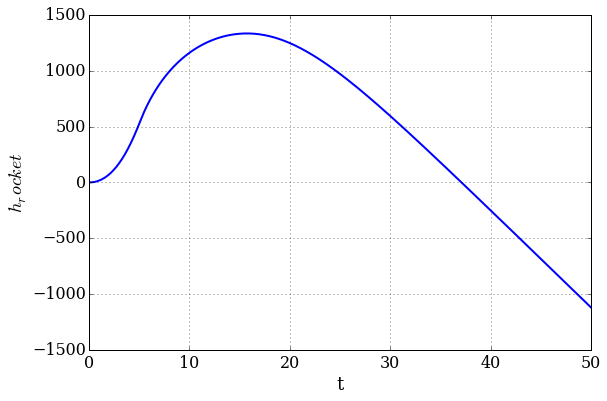

In [7]:
pyplot.figure(figsize=(9,6)) #plot height. Doesn't stop at 0 height, 
#but any data after than can be ignored.
pyplot.grid(True)
pyplot.xlabel('t', fontsize=18)
pyplot.ylabel('$h_rocket}$', fontsize=18)
pyplot.plot(t, u[:,0],ls='-', lw=2);

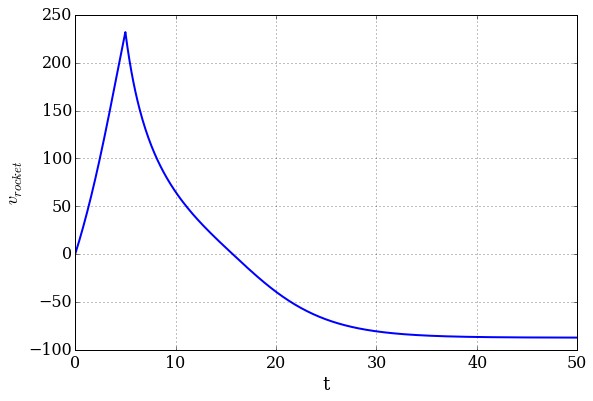

In [8]:
#plot velocity.
pyplot.figure(figsize=(9,6)) 
pyplot.grid(True)
pyplot.xlabel('t', fontsize=18)
pyplot.ylabel('$v_{rocket}$', fontsize=18)
pyplot.plot(t, u[:,1], ls='-', lw=2);

In [9]:
h = u[:,0] #store height and velocity data
v = u[:,1]
m_p = u[:,2]

In [10]:
#question 1 - Remaining fuel
t_32 = numpy.where(t==3.2)[0][0]
print("fuel left at 3.2 seconds: ", m_p[t_32], "kg") #kg of fuel at 3.2 seconds


fuel left at 3.2 seconds:  36.0 kg


In [11]:
#question 2 - maximum velocity
v_max = max(v)
i_max = numpy.where(v==v_max)
t_max = t[i_max[0]]
print("v_max =", v_max)
#print(i_max)
print("time at max velocity = ", t_max)
print("height at max velocity = ", u[i_max, 0])

v_max = 232.13299641
time at max velocity =  [ 5.]
height at max velocity =  [[ 523.62057503]]


In [12]:
#question 3 - maximum height
#print(u[:,0])
h_max = max(h)
i_h_max = numpy.where(h==h_max)
t_h_max = t[i_h_max[0]]
print("h_max =", h_max)
#print(i_h_max)
print("time at max height = ", t_h_max)

h_max = 1334.69988993
time at max height =  [ 15.7]


In [13]:
t_crash = t[numpy.where(u[:,0]<0)[0][0]]
print("time at crash: ", t_crash)
v_crash = v[numpy.where(u[:,0]<0)[0][0]]
print("velocity at crash: ", v_crash)
#print(numpy.where(u[:,0]<0))


time at crash:  37.1
velocity at crash:  -85.9573865732
